#### This is notebook is my first attempt to browse and visualize the data for Wafer Defect.

##### Data is originally from WM-811K dataset provided by [MIR lab](http://mirlab.org/dataSet/public/).
##### The data is converted to pkl format from mat format [here](https://www.kaggle.com/ashishpatel26/wm-811k-wafermap/data).
##### Some of code is borrowed from:

##### Kaggle Section - Load/untar Data from Kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"quantumiiiv","key":"c620b0efe05ee6117f01f8d6d0b2e41f"}'}

In [0]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [0]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 67 Mar  3 16:19 kaggle.json
{"username":"quantumiiiv","key":"c620b0efe05ee6117f01f8d6d0b2e41f"}

In [0]:
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 81kB 3.0MB/s 
     |████████████████████████████████| 5.3MB 8.2MB/s 
     |████████████████████████████████| 112kB 62.2MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 112kB 66.8MB/s 


In [0]:
!kaggle datasets list -s wafer

ref                      title                size  lastUpdated          downloadCount  
-----------------------  ------------------  -----  -------------------  -------------  
qingyi/wm811k-wafer-map  WM-811K wafer map   149MB  2018-02-26 05:44:18           1012  
shawon10/wafermap        WaferMap             25MB  2020-01-14 06:54:10             15  


In [0]:
!kaggle datasets download -d qingyi/wm811k-wafer-map -p /content

 93% 139M/149M [00:01<00:00, 77.8MB/s]
100% 149M/149M [00:01<00:00, 93.6MB/s]


In [0]:
!ls

kaggle.json  sample_data  wm811k-wafer-map.zip


In [0]:
!unzip \wm811k-wafer-map.zip

Archive:  wm811k-wafer-map.zip
  inflating: LSWMD.pkl               


##### Let's load required libraries to process visualize data.**bold text**

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# mport requests
# import os
# from datetime import datetime

# from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
# import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold

# from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, make_scorer, roc_auc_score
# from sklearn.utils   import shuffle

# print(os.listdir("C:/Users/Shahram/Desktop/Microsoft Spam/"))

In [0]:
data = pd.read_pickle ("LSWMD.pkl")
data.rename(columns={'trianTestLabel': 'trainTestLabel'}, inplace=True) # There was a misspleing in trainTestLabel Column name

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
waferMap          811457 non-null object
dieSize           811457 non-null float64
lotName           811457 non-null object
waferIndex        811457 non-null float64
trainTestLabel    811457 non-null object
failureType       811457 non-null object
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [0]:
data.head()

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [0]:
data.tail()

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


Let's take a look at the frequnecy of the wafer indexes

In [0]:
wafer_freq = data.groupby('waferIndex').size().to_frame()
# wafer_freq[0]

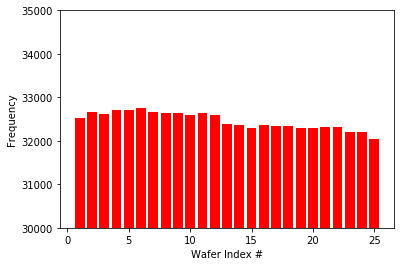

In [0]:
plt.bar(wafer_freq.index,wafer_freq[0], color ='red')
plt.xlabel('Wafer Index #')
plt.ylabel('Frequency')
plt.ylim(30000,35000)
plt.show()

In [0]:
data['WaferMapDim'] = data.waferMap.apply(np.shape)

In [0]:
data.sample(5)

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType,WaferMapDim
715429,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1485.0,lot43645,5.0,[[Test]],[[none]],"(45, 42)"
161389,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,...",515.0,lot10415,20.0,[],[],"(25, 27)"
301071,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4096.0,lot18445,20.0,[],[],"(72, 72)"
427144,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2367.0,lot25724,14.0,[],[],"(51, 59)"
400812,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2111.0,lot24011,25.0,[],[],"(59, 46)"


In [0]:
# This function extracts the content of an array inside data dataframe column.
# I should find a away to write it in a pythonic way.
def extract(x1):
  data = []
  for index, value in x1.items():
    if value.shape[0] != 0:
      data.append (np.take (value, indices = [0][0]))
    else:
      data.append(" ")
  df = pd.DataFrame (data)
  return df

In [0]:
data1 = extract (data.failureType)

In [0]:
data.drop ('failureType', axis = 1, inplace = True)

In [0]:
data['failureType'] = data1

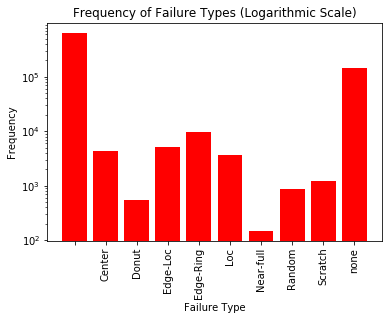

In [0]:
failureType_freq = data.groupby('failureType').size().to_frame()

plt.bar(failureType_freq.index,failureType_freq[0], color ='red')
plt.title ("Frequency of Failure Types (Logarithmic Scale)")
plt.xlabel('Failure Type')
plt.ylabel('Frequency')
plt.yscale ("log")
plt.xticks(rotation=90)
plt.show()

In [0]:
data1 = extract (data.trainTestLabel)
data.drop ('trainTestLabel', axis = 1, inplace = True)
data['trainTestLabel'] = data1

In [0]:
data.trainTestLabel

0         Training
1         Training
2         Training
3         Training
4         Training
            ...   
811452        Test
811453        Test
811454        Test
811455            
811456            
Name: trainTestLabel, Length: 811457, dtype: object

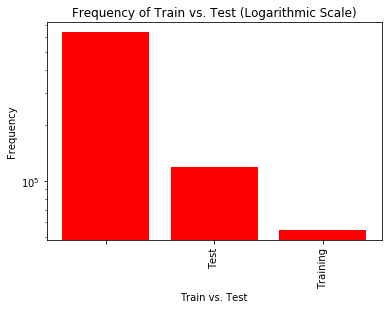

In [0]:
TrainTest_freq = data.groupby('trainTestLabel').size().to_frame()

plt.bar(TrainTest_freq.index,TrainTest_freq[0], color ='red')
plt.title ("Frequency of Train vs. Test (Logarithmic Scale)")
plt.xlabel('Train vs. Test')
plt.ylabel('Frequency')
plt.yscale ("log")
plt.xticks(rotation=90)
plt.show()

In [0]:
TrainTest_freq_groupByDefect = data.groupby(['failureType', 'trainTestLabel']).size()

In [0]:
TrainTest_freq_groupByDefect

failureType  trainTestLabel
                               638507
Center       Test                 832
             Training            3462
Donut        Test                 146
             Training             409
Edge-Loc     Test                2772
             Training            2417
Edge-Ring    Test                1126
             Training            8554
Loc          Test                1973
             Training            1620
Near-full    Test                  95
             Training              54
Random       Test                 257
             Training             609
Scratch      Test                 693
             Training             500
none         Test              110701
             Training           36730
dtype: int64

In [0]:
# plt.bar(TrainTest_freq_groupByDefect.index,TrainTest_freq_groupByDefect[0], color ='red')
# plt.title ("Frequency of train vs. Test (Logarithmic Scale)")
# plt.xlabel('train vs. Test')
# plt.ylabel('Frequency')
# plt.yscale ("log")
# plt.xticks(rotation=90)
# plt.show()

In [0]:
# ax = TrainTest_freq_groupByDefect.plot(kind='bar', figsize=(10,6), color="indigo", fontsize=13);
# ax.set_alpha(0.8)
# ax.set_title("My Bar Plot", fontsize=22)
# ax.set_ylabel("Some Heading on Y-Axis", fontsize=15);
# plt.show()

In [0]:
data.sample(5)

,waferMap,dieSize,lotName,waferIndex,WaferMapDim,failureType,trainTestLabel
797555,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2,...",562.0,lot46976,9.0,"(29, 26)",none,Test
389931,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3878.0,lot23400,23.0,"(88, 56)",,
616451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",712.0,lot38706,25.0,"(32, 29)",,
173926,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1,...",515.0,lot11126,10.0,"(25, 27)",,
328150,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1724.0,lot19780,2.0,"(50, 43)",,


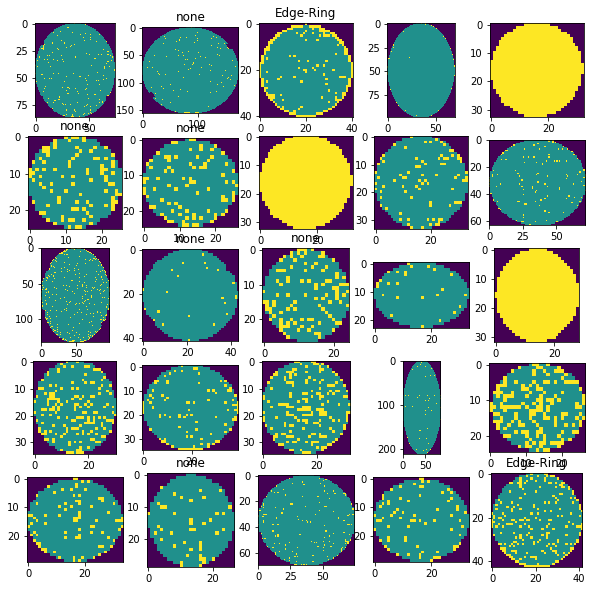

In [0]:
data1 = data.sample(25)
fig = plt.figure(figsize=(10,10))

for i, j in zip (range(1,26), data1.waferMap.index):
  fig.add_subplot(5,5,i)
  plt.title(data1.failureType[j])
  plt.imshow(data1.waferMap[j])
plt.show()

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

In [0]:
# ??DataBunch
fnames = data.failureType; fnames

0              none
1              none
2              none
3              none
4              none
            ...    
811452    Edge-Ring
811453     Edge-Loc
811454    Edge-Ring
811455             
811456             
Name: failureType, Length: 811457, dtype: object

In [0]:
data2 = ImageDataBunch 

In [0]:
# Let's make a new class
# https://docs.fast.ai/basic_data.html#Using-a-custom-Dataset-in-fastai

class ArrayDataset(Dataset):
    "Sample numpy array dataset"
    def __init__(self, x, y):
        self.x, self.y = x, y
        self.c = 2 # binary label
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, i):
        return self.x[i], self.y[i]

In [0]:
failureTypes = data.failureType.unique().tolist(); 
failureTypes.remove (' ')
print(failureTypes)

['none', 'Loc', 'Edge-Loc', 'Center', 'Edge-Ring', 'Scratch', 'Random', 'Near-full', 'Donut']


In [0]:
data1 = data.drop (['dieSize','lotName','waferIndex','WaferMapDim'],axis = 1); data1

,waferMap,failureType,trainTestLabel
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none,Training
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none,Training
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none,Training
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none,Training
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none,Training
...,...,...,...
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",Edge-Ring,Test
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",Edge-Loc,Test
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",Edge-Ring,Test
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",,


In [0]:
data1 = data1.loc[data1['failureType'].isin(failureTypes)]

In [0]:
data1.shape


(172950, 3)

In [0]:
train_validation, test = train_test_split(data1, test_size=0.3)

In [0]:
train_validation

,waferMap,failureType,trainTestLabel
761696,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",none,Test
5729,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2,...",Edge-Loc,Training
645476,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,...",none,Test
759747,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",none,Test
800079,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",none,Test
...,...,...,...
773605,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none,Test
742569,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",none,Test
692395,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none,Test
710179,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...",none,Training


In [0]:
train, validation = train_test_split(train_validation, test_size=0.3)

In [0]:
train

,waferMap,failureType,trainTestLabel
659973,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none,Test
1829,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1,...",none,Training
685799,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none,Test
757262,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",none,Test
763858,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,...",none,Test
...,...,...,...
721529,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2,...",none,Test
242529,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none,Training
692682,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none,Test
797278,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1,...",none,Test


In [0]:
valid